In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) 

DATA_FILE_PATH = '../data/senegal_solar_data.csv' 
COUNTRY_NAME = 'Senegal'
CLEANED_DATA_PATH = f'../data/{COUNTRY_NAME.lower()}_clean.csv'

In [2]:
try:
    df = pd.read_csv(DATA_FILE_PATH, delimiter=';')
except FileNotFoundError:
    print(f"CRITICAL ERROR: The data file {DATA_FILE_PATH} was not found.")
    print("Please ensure:")
    print(f"1. The file actually exists at that path relative to your project root (D:\\Tenx\\solar-challenge-week1\\).")
    print(f"2. The filename in DATA_FILE_PATH ('{DATA_FILE_PATH.split('/')[-1]}') exactly matches the actual file name.")
    print("Stopping execution. Please fix the path or filename and restart the kernel or re-run from the first cell.")
    raise
except Exception as e:
    print(f"CRITICAL ERROR: An unexpected error occurred while trying to read {DATA_FILE_PATH}: {e}")
    print("Stopping execution. Please check the file format and integrity.")
    raise

print(f"--- Initial Data Overview for {COUNTRY_NAME} ---")
print("\nFirst 5 rows (df.head()):")
print(df.head())

print("\nDataframe Info (df.info()):")
df.info()

print("\nDataframe Shape (rows, columns):")
print(df.shape)


timestamp_column_name = 'time'

if timestamp_column_name in df.columns:
    print(f"\nAttempting to convert '{timestamp_column_name}' to datetime...")
    try:
        df[timestamp_column_name] = pd.to_datetime(df[timestamp_column_name])
        print(f"Successfully converted '{timestamp_column_name}' to datetime objects.")
        print("First 5 converted timestamp values:")
        print(df[timestamp_column_name].head())
    except ValueError as ve:
        print(f"\nERROR during datetime conversion for '{timestamp_column_name}': {ve}")
        print("This often means pandas couldn't automatically figure out the date format.")
        print("First 5 values of this column that caused issues:")
        print(df[timestamp_column_name].head())
        print("You might need to specify the `format` argument in pd.to_datetime(), e.g.:")
        print("df[timestamp_column_name] = pd.to_datetime(df[timestamp_column_name], format='%Y-%m-%d %H:%M:%S')")
        print("Please inspect your data and adjust the format string accordingly if conversion fails.")
    except Exception as e:
        print(f"\nAn unexpected ERROR occurred during datetime conversion for '{timestamp_column_name}': {e}")
        print("First 5 values of this column:")
        print(df[timestamp_column_name].head())
else:
    print(f"\nWARNING: The specified timestamp column ('{timestamp_column_name}') was NOT FOUND in the DataFrame.")
    print(f"Available columns are: {df.columns.tolist()}")
    print("Please check the 'timestamp_column_name' variable in this cell and update it to match a real column name from your data.")


C:\Users\HP\AppData\Local\Temp\ipykernel_15192\3519178973.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_FILE_PATH, delimiter=';')


--- Initial Data Overview for Senegal ---

First 5 rows (df.head()):
               time  dhi_rsi  ghi_sil  ghi_pyr  air_temperature  \
0  2016/09/06 00:01      0.0      0.0      0.0            28.13   
1  2016/09/06 00:02      0.0      0.0      0.0            28.12   
2  2016/09/06 00:03      0.0      0.0      0.0            28.11   
3  2016/09/06 00:04      0.0      0.0      0.0            28.14   
4  2016/09/06 00:05      0.0      0.0      0.0            28.16   

   relative_humidity  barometric_pressure  precipitation  wind_speed  \
0               90.3                 1008            0.0       2.047   
1               90.5                 1008            0.0       2.340   
2               90.2                 1008            0.0       2.540   
3               90.1                 1008            0.0       2.580   
4               90.3                 1008            0.0       2.300   

   wind_speed_calc  wind_from_direction  sensor_cleaning comments  
0           2.4312         

In [3]:

print(f"\n--- Summary Statistics for Numeric Columns ({COUNTRY_NAME}) ---")
numeric_cols = df.select_dtypes(include=np.number).columns
print(df[numeric_cols].describe().T) 

print(f"\n--- Missing Value Report ({COUNTRY_NAME}) ---")
missing_values = df.isnull().sum()
missing_values_percent = (missing_values / len(df)) * 100

missing_report = pd.DataFrame({
    'Total Missing': missing_values,
    'Percentage Missing (%)': missing_values_percent
})

print("\nMissing values per column (sorted by percentage):")
print(missing_report[missing_report['Total Missing'] > 0].sort_values(by='Percentage Missing (%)', ascending=False))

total_cells = np.product(df.shape)
total_missing_count = missing_values.sum()
percentage_total_missing_data = (total_missing_count / total_cells) * 100
print(f"\nTotal missing cells in the entire DataFrame: {total_missing_count}")
print(f"Percentage of total data that is missing: {percentage_total_missing_data:.2f}%")

print("\nColumns with >5% missing values:")
columns_with_high_missing = missing_report[missing_report['Percentage Missing (%)'] > 5]
if not columns_with_high_missing.empty:
    print(columns_with_high_missing.sort_values(by='Percentage Missing (%)', ascending=False))
else:
    print("No columns have more than 5% missing values.")

print("\n--- Data Types ---")
print(df.dtypes)


--- Summary Statistics for Numeric Columns (Senegal) ---
                        count         mean         std       min        25%  \
dhi_rsi              561444.0   123.243467  161.455819     0.000     0.0000   
ghi_sil              561600.0   244.139533  327.301254    -0.406     0.0000   
ghi_pyr              561600.0   252.490026  337.900730     0.000     0.0000   
air_temperature      561600.0    28.621052    5.248308    14.690    24.8600   
relative_humidity    559291.0    51.191139   30.427839     2.709    21.5100   
barometric_pressure  561600.0  1007.662988    2.090065  1000.000  1006.0000   
precipitation        561600.0     0.001071    0.029604     0.000     0.0000   
wind_speed           561600.0     3.080219    1.577188     0.000     1.8600   
wind_speed_calc      561600.0     3.658294    1.873183     0.000     2.2091   
wind_from_direction  561600.0   193.269113  123.243492     0.000    55.1600   
sensor_cleaning      561600.0     0.000242    0.015560     0.000     0.00


--- Outlier Detection & Basic Cleaning (Senegal) ---

Generating boxplots for visual outlier detection...


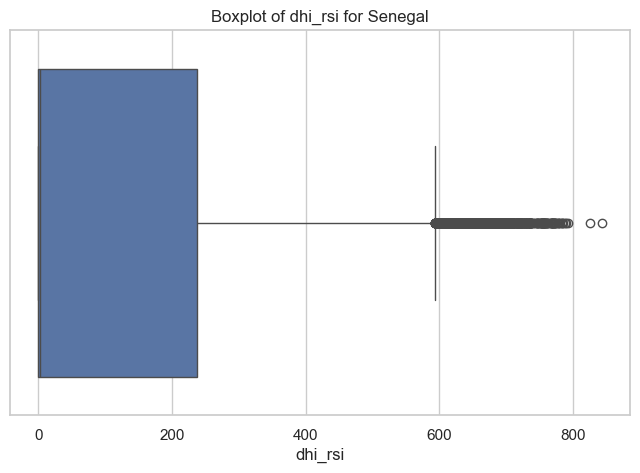

Stats for dhi_rsi:
  Min: 0.00, Max: 843.00
  Median: 2.96, Mean: 123.24
  NaNs: 156


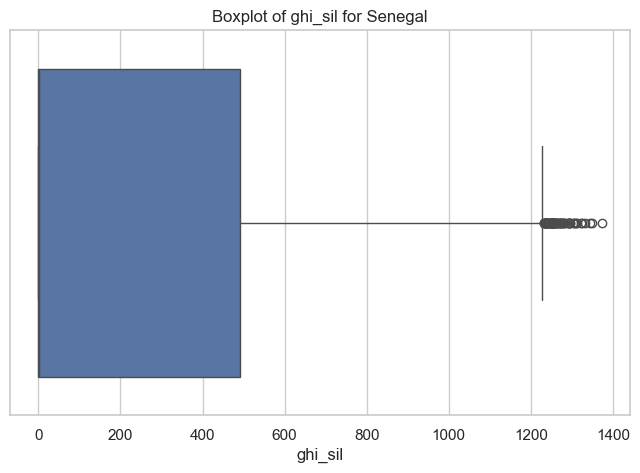

Stats for ghi_sil:
  Min: -0.41, Max: 1373.00
  Median: 2.80, Mean: 244.14
  NaNs: 0


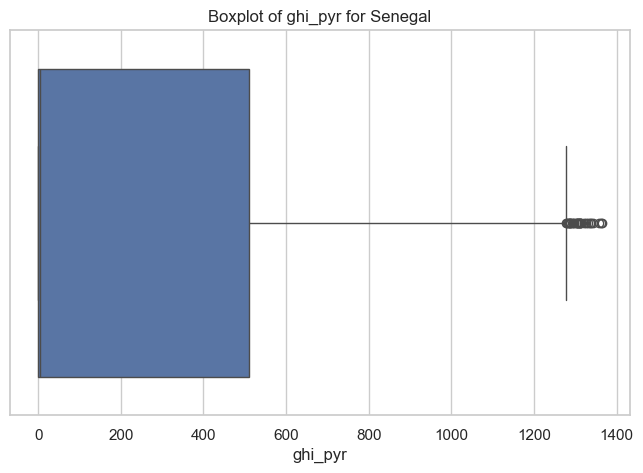

Stats for ghi_pyr:
  Min: 0.00, Max: 1364.00
  Median: 4.25, Mean: 252.49
  NaNs: 0


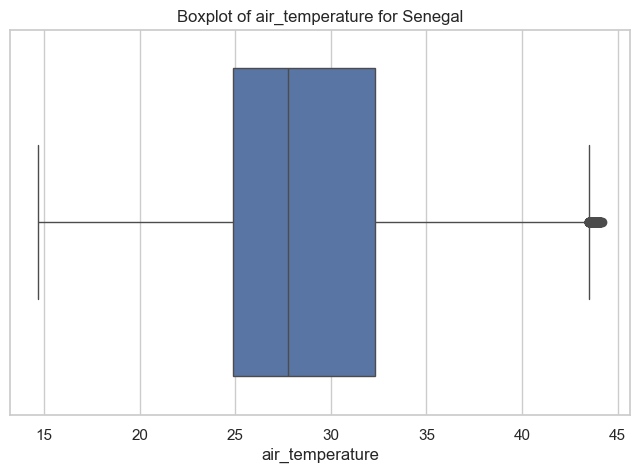

Stats for air_temperature:
  Min: 14.69, Max: 44.17
  Median: 27.78, Mean: 28.62
  NaNs: 0


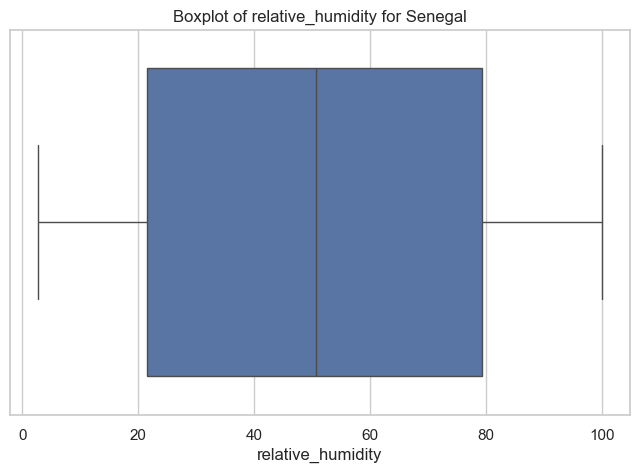

Stats for relative_humidity:
  Min: 2.71, Max: 100.00
  Median: 50.74, Mean: 51.19
  NaNs: 2309


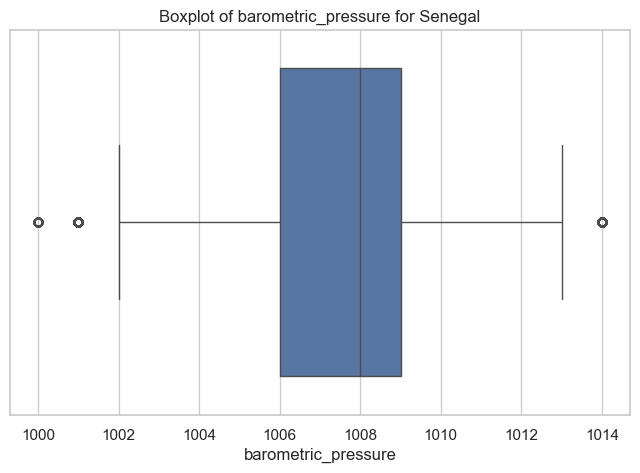

Stats for barometric_pressure:
  Min: 1000.00, Max: 1014.00
  Median: 1008.00, Mean: 1007.66
  NaNs: 0


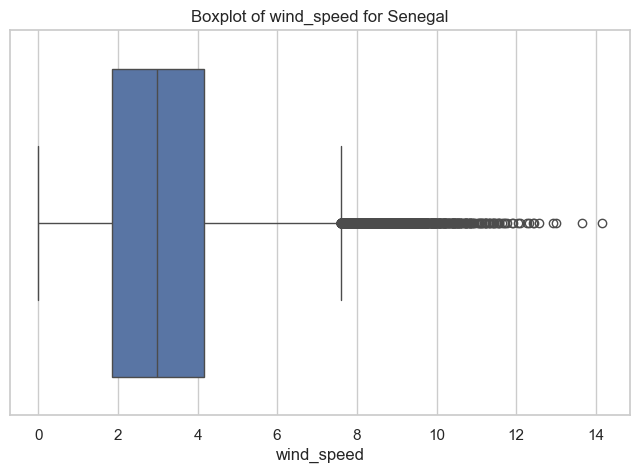

Stats for wind_speed:
  Min: 0.00, Max: 14.15
  Median: 2.98, Mean: 3.08
  NaNs: 0


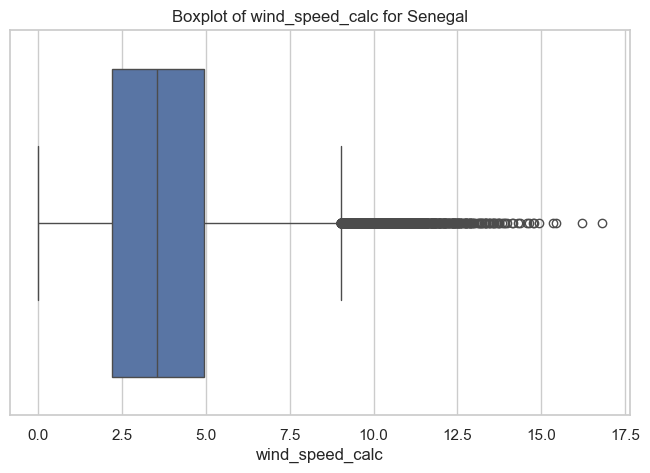

Stats for wind_speed_calc:
  Min: 0.00, Max: 16.81
  Median: 3.54, Mean: 3.66
  NaNs: 0


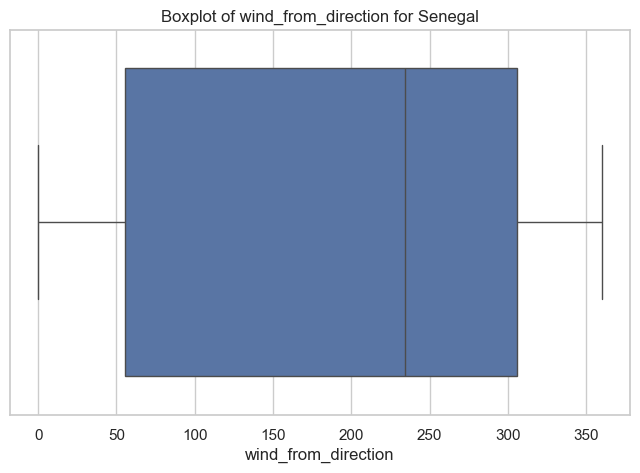

Stats for wind_from_direction:
  Min: 0.00, Max: 360.00
  Median: 234.60, Mean: 193.27
  NaNs: 0

Calculating Z-scores for: ['dhi_rsi', 'ghi_sil', 'ghi_pyr', 'wind_speed', 'wind_speed_calc']
  Number of potential outliers in 'dhi_rsi' (Z-score > 3): 2955 (0.53%)
  Number of potential outliers in 'ghi_sil' (Z-score > 3): 71 (0.01%)
  Number of potential outliers in 'ghi_pyr' (Z-score > 3): 38 (0.01%)
  Number of potential outliers in 'wind_speed' (Z-score > 3): 1617 (0.29%)
  Number of potential outliers in 'wind_speed_calc' (Z-score > 3): 1617 (0.29%)

Imputing missing values with median for selected columns:
  Imputed missing values in 'dhi_rsi' with median (2.96)
  Imputed missing values in 'relative_humidity' with median (50.74)
  Filled NaNs in 'comments' column with 'No Comment'.

Total rows flagged with at least one Z-score > 3: 4437

--- Missing Value Report After Basic Cleaning ---
dhi_rsi_Zscore    156
dtype: int64

Cleaned data (with Z-score columns and outlier flag) exported

In [4]:

print(f"\n--- Outlier Detection & Basic Cleaning ({COUNTRY_NAME}) ---")
df_cleaned = df.copy()

boxplot_cols = ['dhi_rsi', 'ghi_sil', 'ghi_pyr', 'air_temperature', 
                'relative_humidity', 'barometric_pressure', 
                'wind_speed', 'wind_speed_calc', 'wind_from_direction']
boxplot_cols = [col for col in boxplot_cols if col in df_cleaned.columns]

print("\nGenerating boxplots for visual outlier detection...")
for col in boxplot_cols:
    if pd.api.types.is_numeric_dtype(df_cleaned[col]): # Ensure it's numeric
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df_cleaned[col])
        plt.title(f'Boxplot of {col} for {COUNTRY_NAME}')
        plt.show()
        print(f"Stats for {col}:")
        print(f"  Min: {df_cleaned[col].min():.2f}, Max: {df_cleaned[col].max():.2f}")
        print(f"  Median: {df_cleaned[col].median():.2f}, Mean: {df_cleaned[col].mean():.2f}")
        print(f"  NaNs: {df_cleaned[col].isnull().sum()}")
    else:
        print(f"Skipping boxplot for {col} as it is not numeric.")


zscore_target_cols = ['dhi_rsi', 'ghi_sil', 'ghi_pyr', 'wind_speed', 'wind_speed_calc']
zscore_cols = [col for col in zscore_target_cols if col in df_cleaned.columns and pd.api.types.is_numeric_dtype(df_cleaned[col])]

print(f"\nCalculating Z-scores for: {zscore_cols}")
for col in zscore_cols:
    col_not_na = df_cleaned[col].dropna()
    if len(col_not_na) > 0:
        z_scores = stats.zscore(col_not_na)
        z_scores_series = pd.Series(z_scores, index=col_not_na.index)
        df_cleaned[f'{col}_Zscore'] = z_scores_series
        
        outliers_count = (df_cleaned[f'{col}_Zscore'].abs() > 3).sum()
        print(f"  Number of potential outliers in '{col}' (Z-score > 3): {outliers_count} ({(outliers_count/len(df_cleaned)*100):.2f}%)")
    else:
        print(f"  Skipping Z-score for '{col}' as it contains no non-NaN values.")


cols_to_impute_median = ['dhi_rsi', 'relative_humidity'] 
print("\nImputing missing values with median for selected columns:")
for col in cols_to_impute_median:
    if col in df_cleaned.columns and df_cleaned[col].isnull().any():
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)
        print(f"  Imputed missing values in '{col}' with median ({median_val:.2f})")
    elif col not in df_cleaned.columns:
        print(f"  Warning: Column '{col}' not found for imputation.")


if 'comments' in df_cleaned.columns:
    df_cleaned['comments'].fillna('No Comment', inplace=True)
    print("  Filled NaNs in 'comments' column with 'No Comment'.")


z_score_flag_cols = [f'{col}_Zscore' for col in zscore_cols if f'{col}_Zscore' in df_cleaned.columns]
if z_score_flag_cols:
    df_cleaned['is_outlier_any_Z3'] = (df_cleaned[z_score_flag_cols].abs() > 3).any(axis=1)
    print(f"\nTotal rows flagged with at least one Z-score > 3: {df_cleaned['is_outlier_any_Z3'].sum()}")


print("\n--- Missing Value Report After Basic Cleaning ---")
missing_after_cleaning = df_cleaned.isnull().sum()
print(missing_after_cleaning[missing_after_cleaning > 0])


try:
    df_cleaned.to_csv(CLEANED_DATA_PATH, index=False)
    print(f"\nCleaned data (with Z-score columns and outlier flag) exported to {CLEANED_DATA_PATH}")
except Exception as e:
    print(f"\nError exporting cleaned data: {e}")

print("\n--- df_cleaned Head ---")
print(df_cleaned.head())
print("\n--- df_cleaned Info ---")
df_cleaned.info()


--- Time Series Analysis (Senegal) ---

Plotting key variables over the entire period (may be slow for full dataset)...
Plotting a sample of 50000 data points for performance.


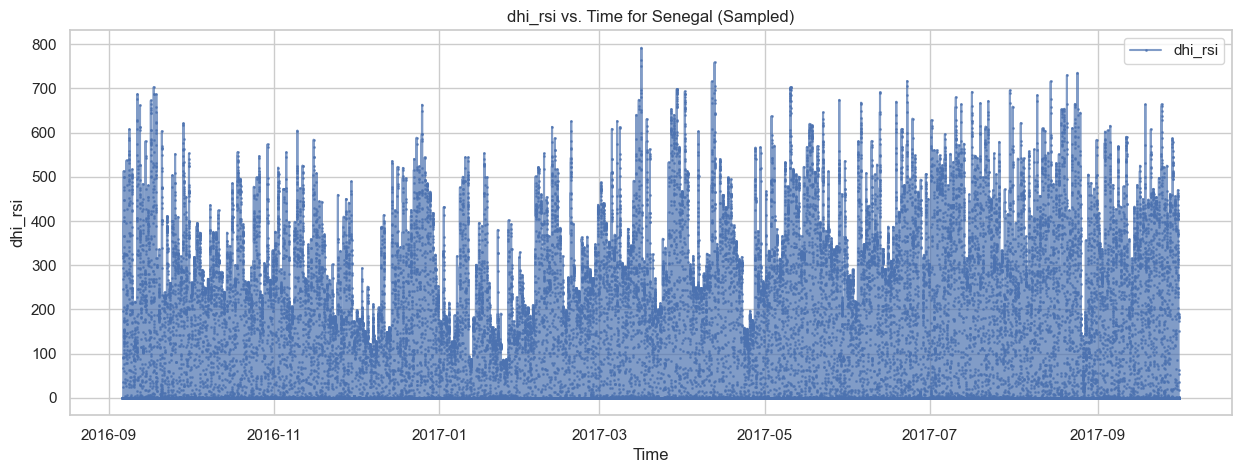

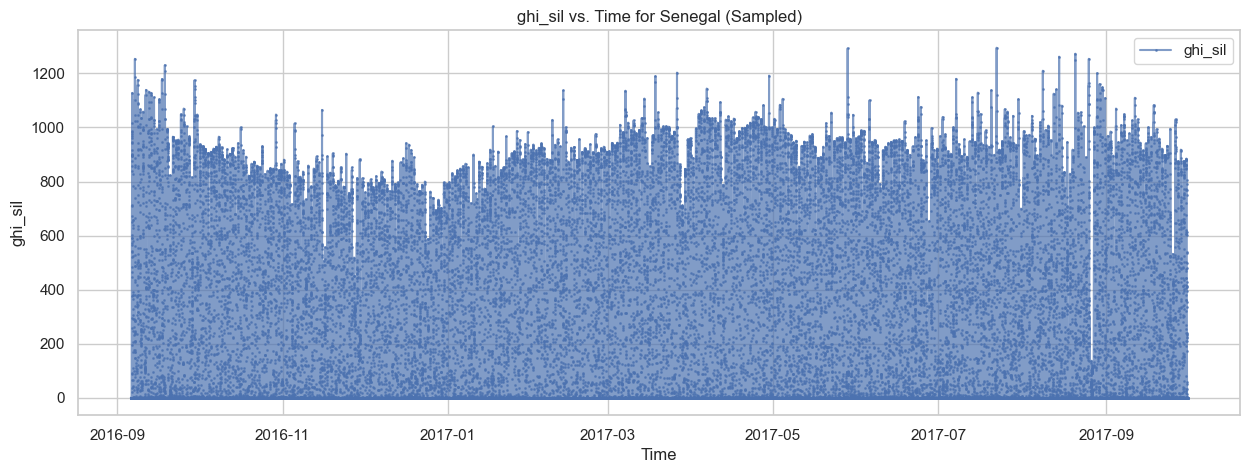

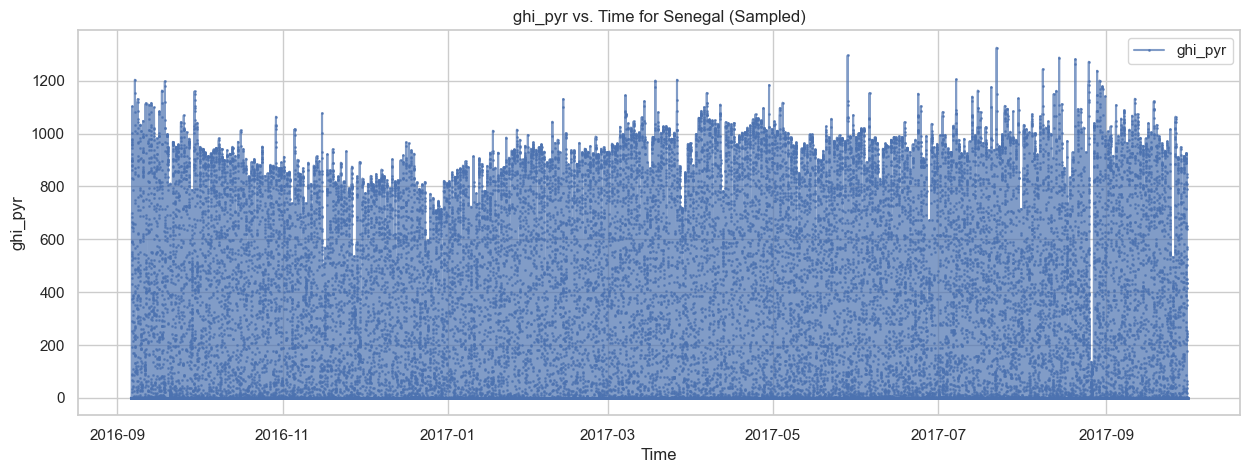

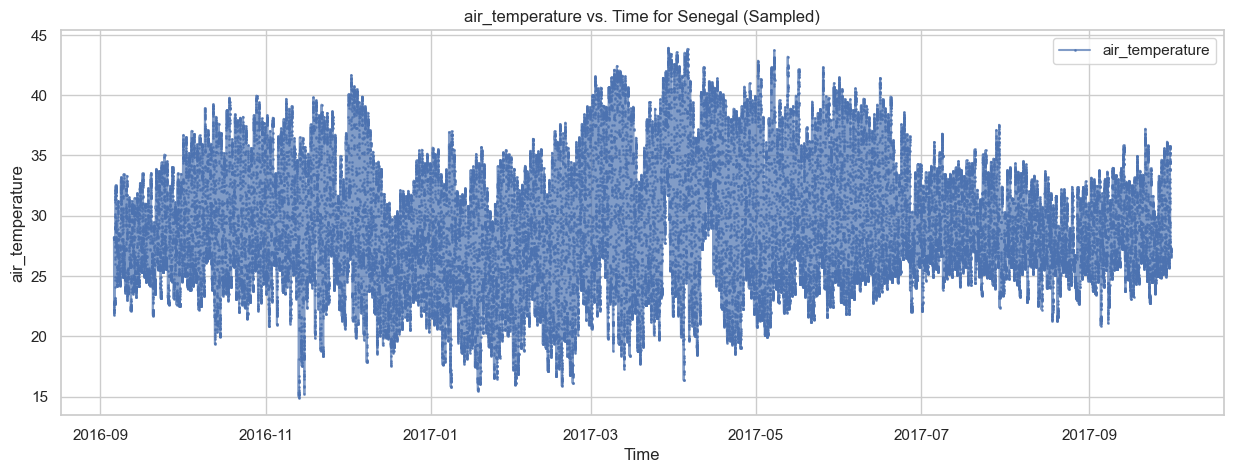


Analyzing aggregated patterns (Daily, Monthly Averages)...


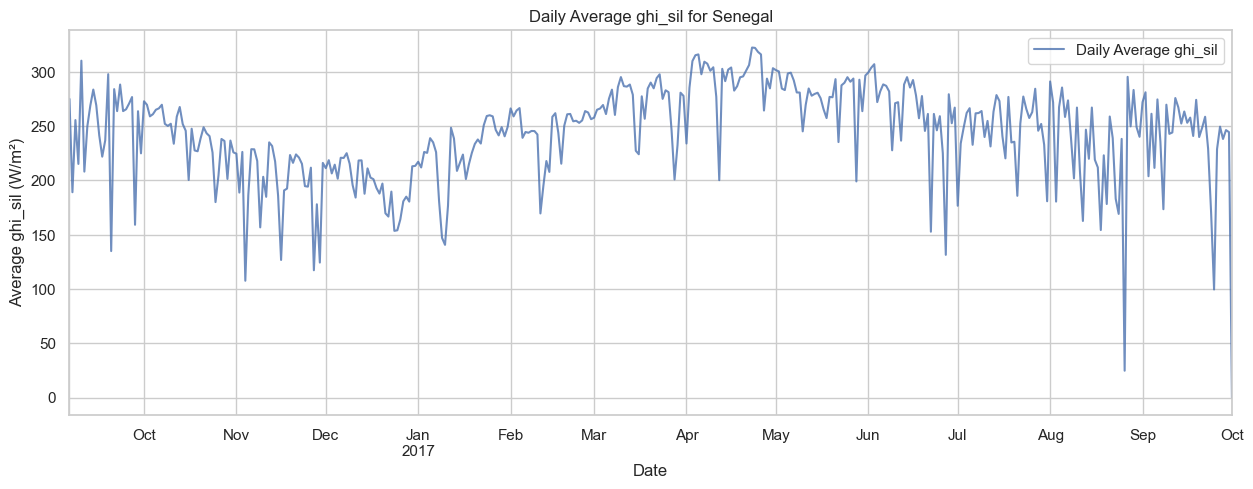

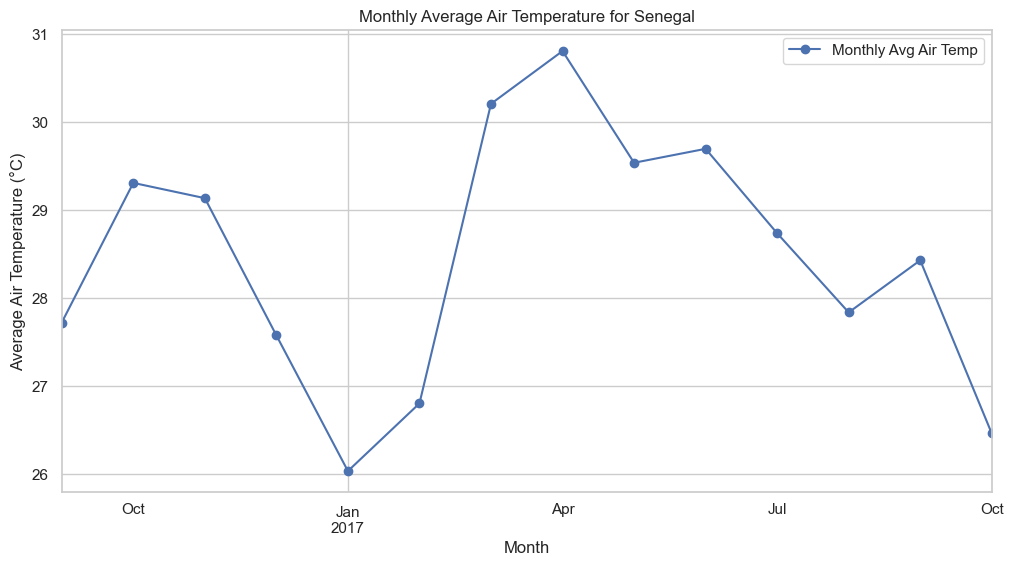

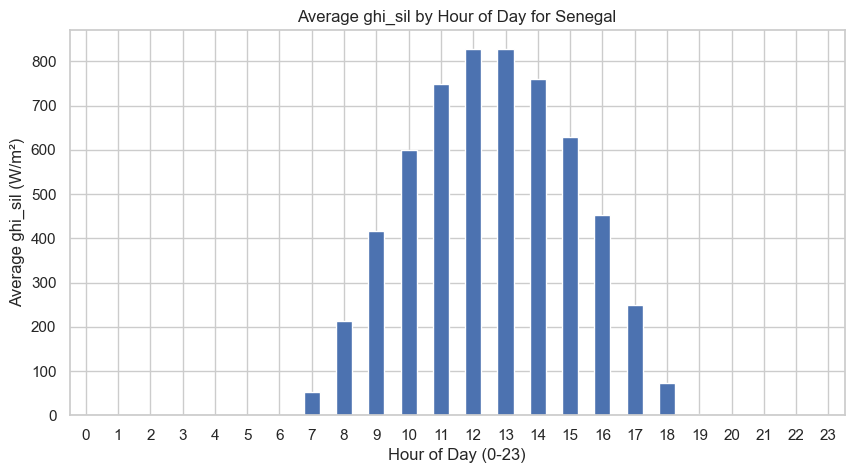

In [5]:

print(f"\n--- Time Series Analysis ({COUNTRY_NAME}) ---")

if 'time' not in df_cleaned.columns or not pd.api.types.is_datetime64_any_dtype(df_cleaned['time']):
    print("Skipping Time Series Analysis as 'time' column is not available or not in datetime format.")
else:
    df_ts_plot = df_cleaned.copy()

    df_ts_plot.sort_values(by='time', inplace=True)

    ts_cols_to_plot = ['dhi_rsi', 'ghi_sil', 'ghi_pyr', 'air_temperature']
    ts_cols_to_plot = [col for col in ts_cols_to_plot if col in df_ts_plot.columns]

    if not ts_cols_to_plot:
        print("No key columns (dhi_rsi, ghi_sil, ghi_pyr, air_temperature) found for time series plotting.")
    else:
        print("\nPlotting key variables over the entire period (may be slow for full dataset)...")
       
        sample_size = 50000 # Adjust as needed, or plot aggregates
        if len(df_ts_plot) > sample_size:
            df_sample_ts = df_ts_plot.sample(n=sample_size, random_state=42).sort_values(by='time')
            print(f"Plotting a sample of {sample_size} data points for performance.")
        else:
            df_sample_ts = df_ts_plot
            print("Plotting all data points.")


        for col in ts_cols_to_plot:
            plt.figure(figsize=(15, 5))
            plt.plot(df_sample_ts['time'], df_sample_ts[col], label=col, alpha=0.7, linestyle='-', marker='.', markersize=2)
            plt.title(f'{col} vs. Time for {COUNTRY_NAME} (Sampled)')
            plt.xlabel('Time')
            plt.ylabel(col)
            plt.legend()
            plt.show()

    df_ts_plot.set_index('time', inplace=True)

    print("\nAnalyzing aggregated patterns (Daily, Monthly Averages)...")

    if 'ghi_sil' in df_ts_plot.columns:
        daily_avg_ghi = df_ts_plot['ghi_sil'].resample('D').mean() # 'D' for daily
        plt.figure(figsize=(15, 5))
        daily_avg_ghi.plot(label='Daily Average ghi_sil', alpha=0.8)
        plt.title(f'Daily Average ghi_sil for {COUNTRY_NAME}')
        plt.xlabel('Date')
        plt.ylabel('Average ghi_sil (W/m²)')
        plt.legend()
        plt.show()

    if 'air_temperature' in df_ts_plot.columns:
        monthly_avg_temp = df_ts_plot['air_temperature'].resample('M').mean() # 'M' for monthly
        plt.figure(figsize=(12, 6))
        monthly_avg_temp.plot(kind='line', marker='o', label='Monthly Avg Air Temp')
        plt.title(f'Monthly Average Air Temperature for {COUNTRY_NAME}')
        plt.xlabel('Month')
        plt.ylabel('Average Air Temperature (°C)')
        plt.legend()
        plt.show()

    if 'ghi_sil' in df_ts_plot.columns:
        # Ensure the index is datetime before accessing .hour
        if isinstance(df_ts_plot.index, pd.DatetimeIndex):
            hourly_avg_ghi = df_ts_plot.groupby(df_ts_plot.index.hour)['ghi_sil'].mean()
            plt.figure(figsize=(10, 5))
            hourly_avg_ghi.plot(kind='bar')
            plt.title(f'Average ghi_sil by Hour of Day for {COUNTRY_NAME}')
            plt.xlabel('Hour of Day (0-23)')
            plt.ylabel('Average ghi_sil (W/m²)')
            plt.xticks(rotation=0)
            plt.show()
        else:
            print("Could not plot hourly average GHI: index is not DatetimeIndex.")


--- Cleaning Impact Analysis (Senegal) ---
Found 136 cleaning event records.

Comparing average sensor values based on 'sensor_cleaning' flag:
                    ghi_sil     dhi_rsi     ghi_pyr
sensor_cleaning                                    
0                244.093435  123.180875  252.442281
1                434.450515  243.673456  449.601029


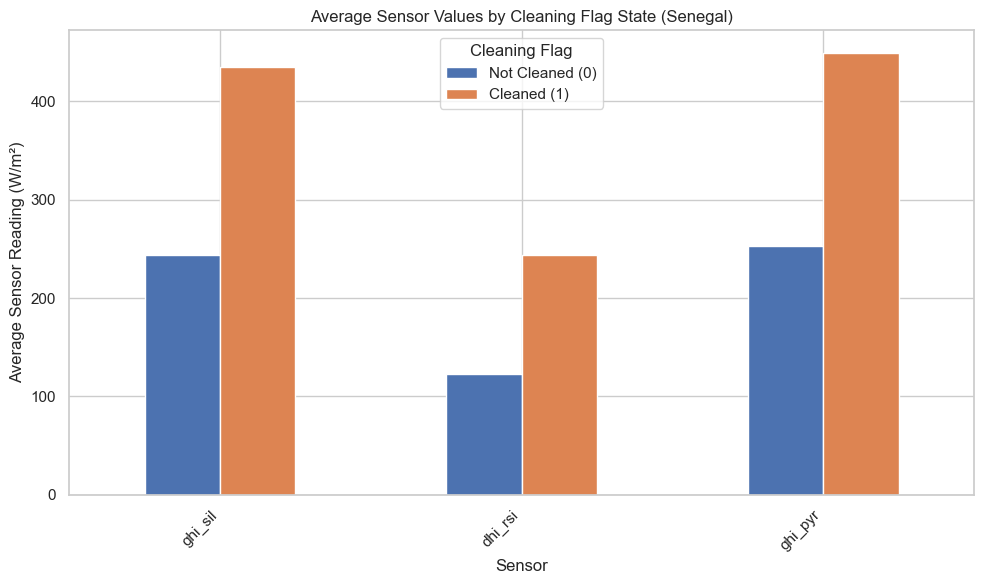


Note: The above analysis is a simple grouping. True impact requires analyzing periods immediately before/after specific cleaning times.
Given the rarity of cleaning events, ensure the 'Cleaned (1)' averages are based on sufficient data points.
Number of data points where sensor_cleaning == 1: 136
Number of data points where sensor_cleaning == 0: 561464


In [6]:

print(f"\n--- Cleaning Impact Analysis ({COUNTRY_NAME}) ---")

if 'sensor_cleaning' not in df_cleaned.columns:
    print("Skipping Cleaning Impact: 'sensor_cleaning' column missing.")
else:
    cleaning_events_indices = df_cleaned[df_cleaned['sensor_cleaning'] == 1].index

    if cleaning_events_indices.empty:
        print("No cleaning events (sensor_cleaning == 1) found in the dataset.")
    else:
        print(f"Found {len(cleaning_events_indices)} cleaning event records.")
        
    
        relevant_sensors = ['ghi_sil', 'dhi_rsi', 'ghi_pyr']
        relevant_sensors = [col for col in relevant_sensors if col in df_cleaned.columns]

        if not relevant_sensors:
            print("No relevant sensor columns (ghi_sil, dhi_rsi, ghi_pyr) found for cleaning impact analysis.")
        else:
            print("\nComparing average sensor values based on 'sensor_cleaning' flag:")
            try:
                cleaning_impact_means = df_cleaned.groupby('sensor_cleaning')[relevant_sensors].mean()
                print(cleaning_impact_means)

                if not cleaning_impact_means.empty:
                    cleaning_impact_means.T.plot(kind='bar', figsize=(10,6)) # Transpose for better plotting
                    plt.title(f'Average Sensor Values by Cleaning Flag State ({COUNTRY_NAME})')
                    plt.ylabel('Average Sensor Reading (W/m²)')
                    plt.xlabel('Sensor')
                    plt.xticks(rotation=45, ha='right')
                    plt.legend(title='Cleaning Flag', labels=['Not Cleaned (0)', 'Cleaned (1)'])
                    plt.tight_layout()
                    plt.show()
                else:
                    print("Could not generate plot for cleaning impact (empty means).")

            
                print("\nNote: The above analysis is a simple grouping. True impact requires analyzing periods immediately before/after specific cleaning times.")
                print("Given the rarity of cleaning events, ensure the 'Cleaned (1)' averages are based on sufficient data points.")
                print(f"Number of data points where sensor_cleaning == 1: {df_cleaned['sensor_cleaning'].sum()}")
                print(f"Number of data points where sensor_cleaning == 0: {(df_cleaned['sensor_cleaning']==0).sum()}")


            except Exception as e:
                print(f"Error during cleaning impact analysis: {e}")


--- Correlation & Relationship Analysis (Senegal) ---


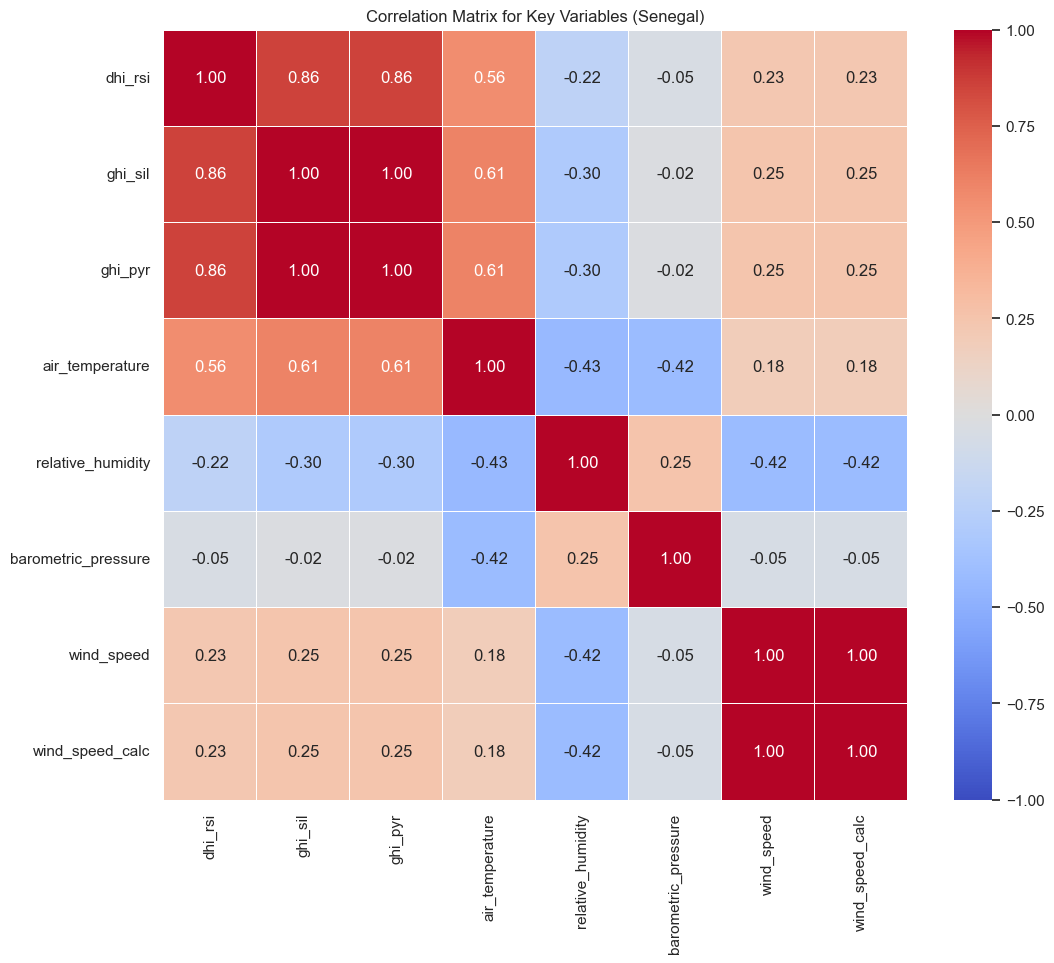


Generating scatter plots for relationship analysis...


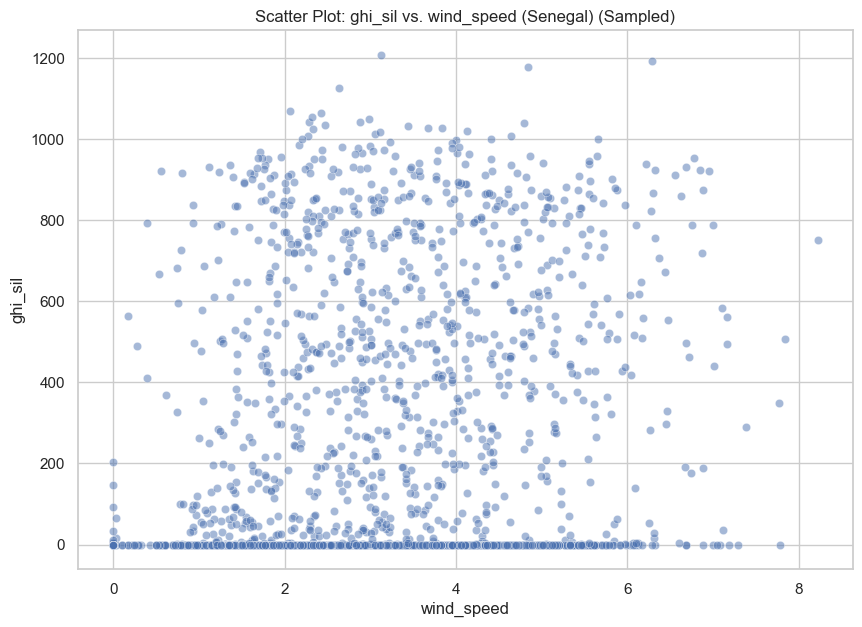

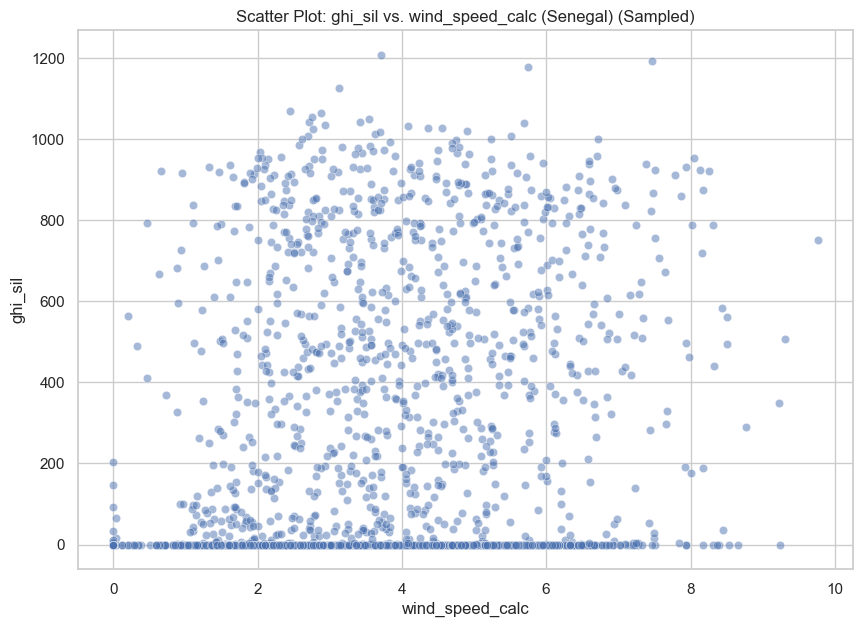

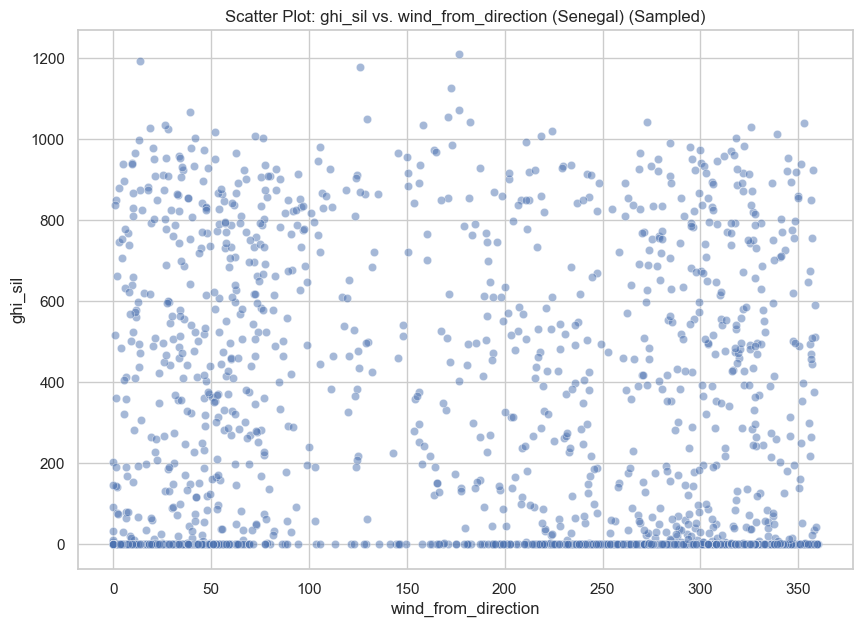

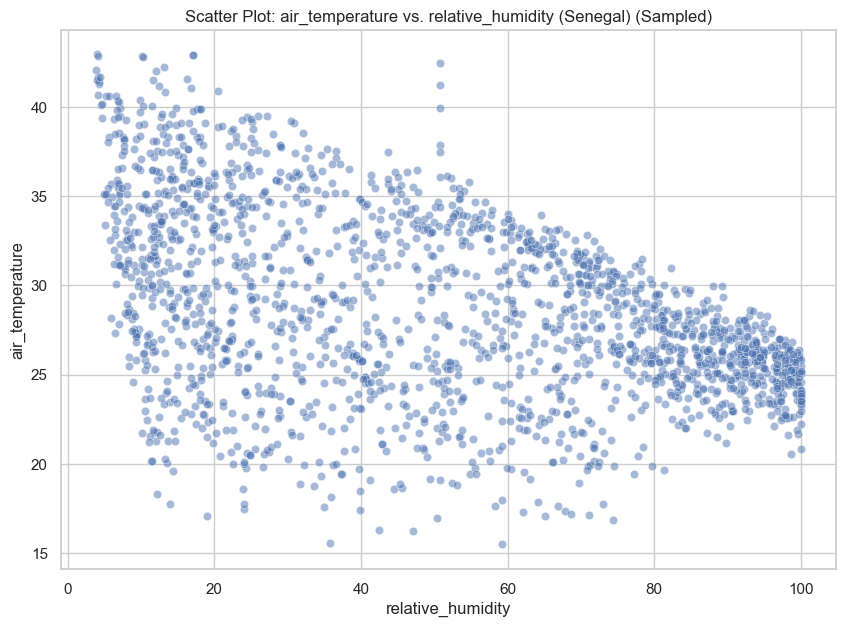

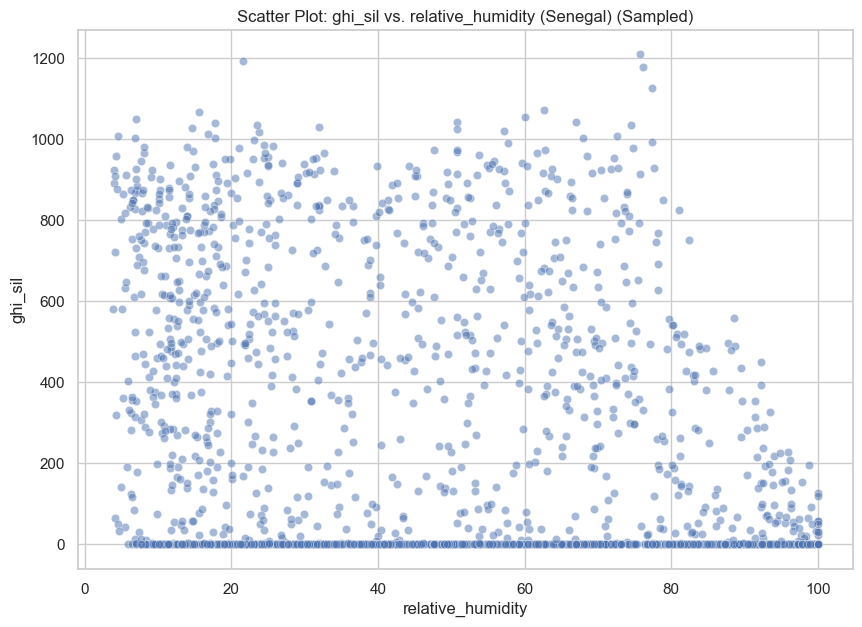

In [7]:

print(f"\n--- Correlation & Relationship Analysis ({COUNTRY_NAME}) ---")

corr_cols = ['dhi_rsi', 'ghi_sil', 'ghi_pyr', 
             'air_temperature', 'relative_humidity', 'barometric_pressure',
             'wind_speed', 'wind_speed_calc']
corr_cols = [col for col in corr_cols if col in df_cleaned.columns and pd.api.types.is_numeric_dtype(df_cleaned[col])]

if len(corr_cols) < 2:
    print("Not enough numeric columns for correlation heatmap.")
else:
  
    correlation_matrix = df_cleaned[corr_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix for Key Variables ({COUNTRY_NAME})')
    plt.show()

print("\nGenerating scatter plots for relationship analysis...")
sample_size_scatter = 2000 # Adjust if too sparse or too dense
df_scatter_sample = df_cleaned.sample(n=min(sample_size_scatter, len(df_cleaned)), random_state=42)

scatter_plot_pairs = [
    ('wind_speed', 'ghi_sil'),
    ('wind_speed_calc', 'ghi_sil'),
    ('wind_from_direction', 'ghi_sil'), 
    ('relative_humidity', 'air_temperature'),
    ('relative_humidity', 'ghi_sil')
]

for x_col, y_col in scatter_plot_pairs:
    if x_col in df_scatter_sample.columns and y_col in df_scatter_sample.columns:
        plt.figure(figsize=(10, 7))
        sns.scatterplot(data=df_scatter_sample, x=x_col, y=y_col, alpha=0.5, 
                       )
        plt.title(f'Scatter Plot: {y_col} vs. {x_col} ({COUNTRY_NAME}) (Sampled)')
        plt.xlabel(x_col)
        plt.ylabel(y_col)

        plt.show()
    else:
        print(f"Skipping scatter plot for {y_col} vs {x_col}: One or both columns missing.")


--- Wind & Distribution Analysis (Senegal) ---
Windrose library not installed. Skipping Wind Rose plot.
To install: pip install windrose
Basic scatter of WD vs WS as a proxy (already shown in Cell 7 if run).

Generating histograms for key variables...


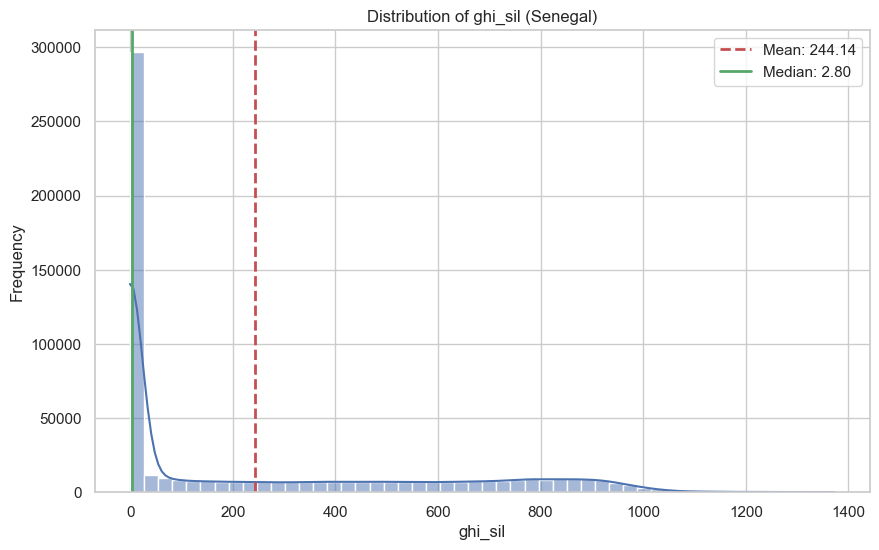

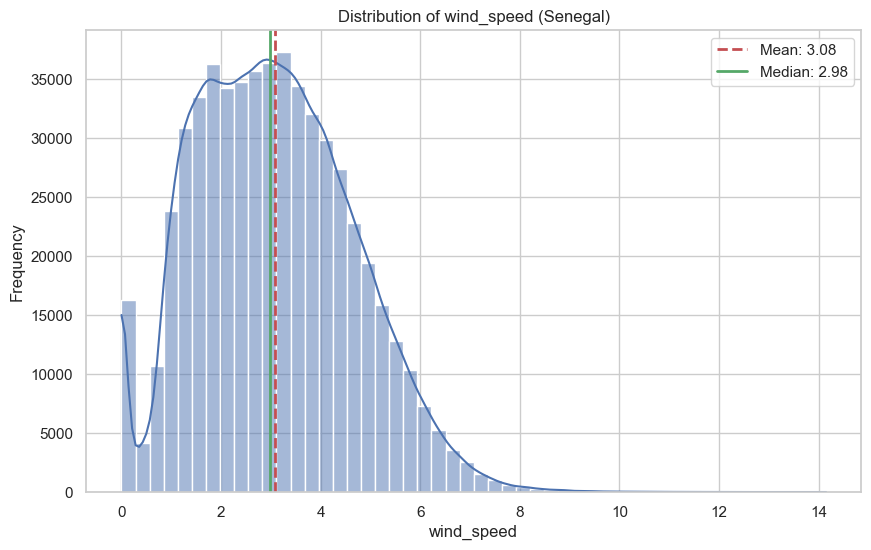

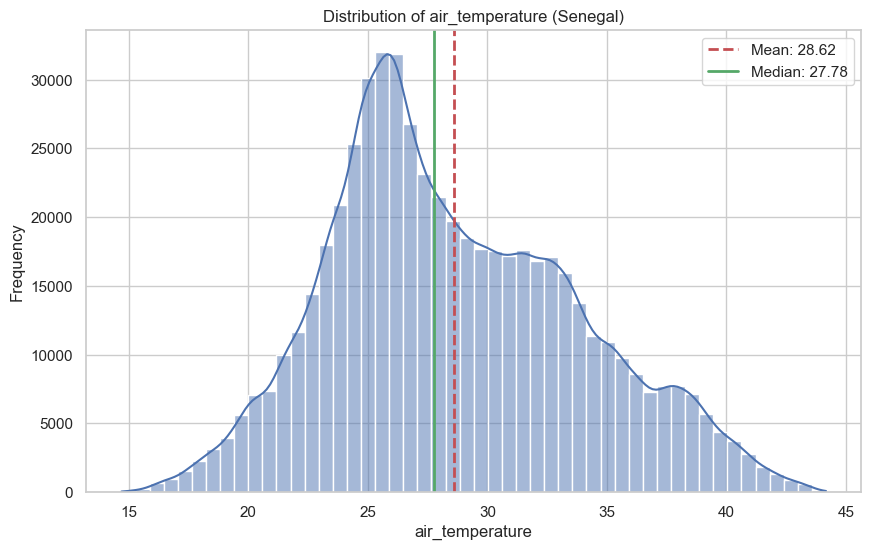

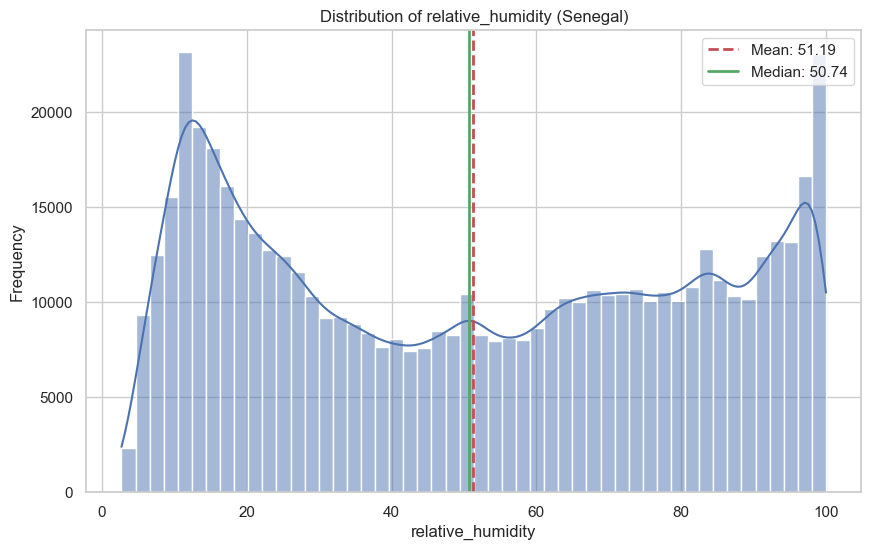

In [8]:

print(f"\n--- Wind & Distribution Analysis ({COUNTRY_NAME}) ---")

if 'wind_speed' in df_cleaned.columns and 'wind_from_direction' in df_cleaned.columns:
    try:
        from windrose import WindroseAxes
        
    
        wind_data_for_rose = df_cleaned[['wind_speed', 'wind_from_direction']].dropna()

        if not wind_data_for_rose.empty:
            fig = plt.figure(figsize=(10, 10))
            ax = WindroseAxes.from_ax(fig=fig)
            ax.bar(wind_data_for_rose['wind_from_direction'], wind_data_for_rose['wind_speed'], normed=True, opening=0.8, edgecolor='white')
            ax.set_legend(title='Wind Speed (m/s)')
            plt.title(f'Wind Rose for {COUNTRY_NAME}', y=1.08)
            plt.show()
        else:
            print("No data available for wind rose after dropping NaNs from wind_speed/wind_from_direction.")

    except ImportError:
        print("Windrose library not installed. Skipping Wind Rose plot.")
        print("To install: pip install windrose")
        print("Basic scatter of WD vs WS as a proxy (already shown in Cell 7 if run).")
    except Exception as e:
        print(f"Error creating wind rose: {e}")
else:
    print("Skipping Wind Rose Plot: 'wind_speed' or 'wind_from_direction' column missing.")



hist_cols = ['ghi_sil', 'wind_speed', 'air_temperature', 'relative_humidity']
hist_cols = [col for col in hist_cols if col in df_cleaned.columns]

print("\nGenerating histograms for key variables...")
if not hist_cols:
    print("No suitable columns found for histograms.")
else:
    for col in hist_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_cleaned[col].dropna(), kde=True, bins=50)
        plt.title(f'Distribution of {col} ({COUNTRY_NAME})')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        
        plt.axvline(df_cleaned[col].mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {df_cleaned[col].mean():.2f}')
        plt.axvline(df_cleaned[col].median(), color='g', linestyle='-', linewidth=2, label=f'Median: {df_cleaned[col].median():.2f}')
        plt.legend()
        plt.show()


--- Temperature Analysis (Senegal) ---


C:\Users\HP\AppData\Local\Temp\ipykernel_15192\4099162534.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


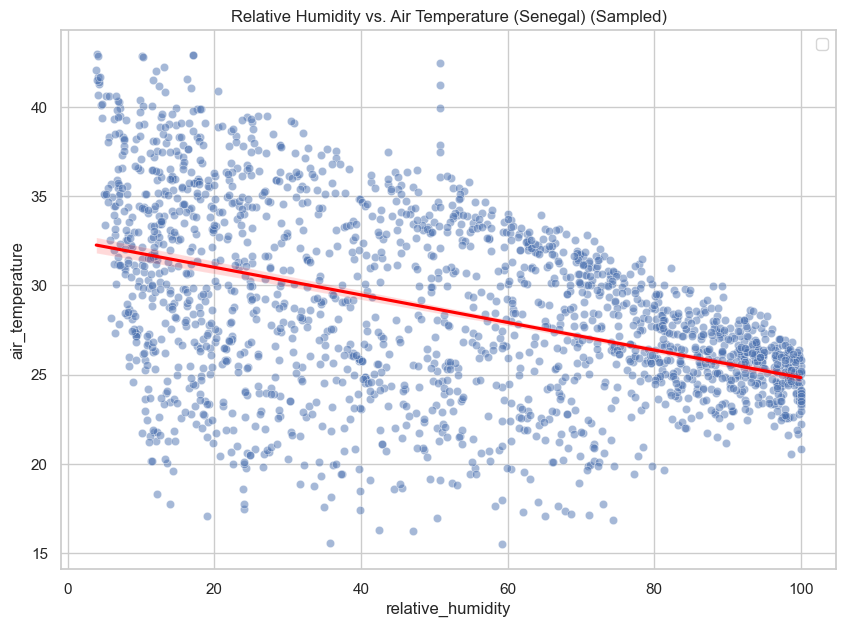

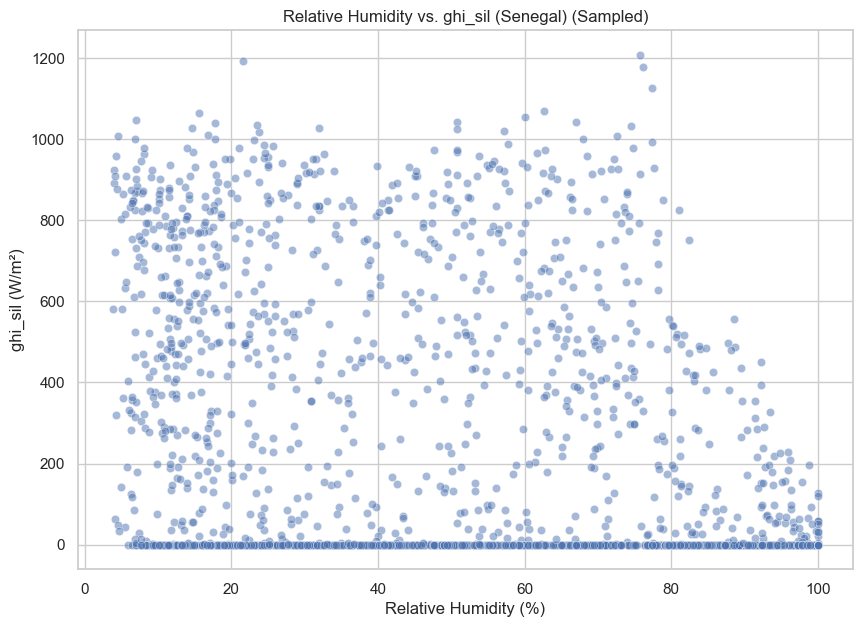

Note: Dataset does not contain Module Temperature columns (TModA, TModB) for this specific analysis.


In [9]:

print(f"\n--- Temperature Analysis ({COUNTRY_NAME}) ---")

if 'relative_humidity' in df_cleaned.columns and 'air_temperature' in df_cleaned.columns:
    plt.figure(figsize=(10, 7))
  
    sns.scatterplot(data=df_scatter_sample, x='relative_humidity', y='air_temperature', alpha=0.5)
    plt.title(f'Relative Humidity vs. Air Temperature ({COUNTRY_NAME}) (Sampled)')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Air Temperature (°C)')
    sns.regplot(data=df_scatter_sample, x='relative_humidity', y='air_temperature', scatter=False, color='red', line_kws={'label':"Linear Fit"})
    plt.legend()
    plt.show()
else:
    print("Skipping RH vs Air Temp plot: columns missing.")

if 'relative_humidity' in df_cleaned.columns and 'ghi_sil' in df_cleaned.columns:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_scatter_sample, x='relative_humidity', y='ghi_sil', alpha=0.5)
    plt.title(f'Relative Humidity vs. ghi_sil ({COUNTRY_NAME}) (Sampled)')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('ghi_sil (W/m²)')
    plt.show()
else:
    print("Skipping RH vs GHI plot: columns missing.")

print("Note: Dataset does not contain Module Temperature columns (TModA, TModB) for this specific analysis.")


--- Bubble Chart (Senegal) ---


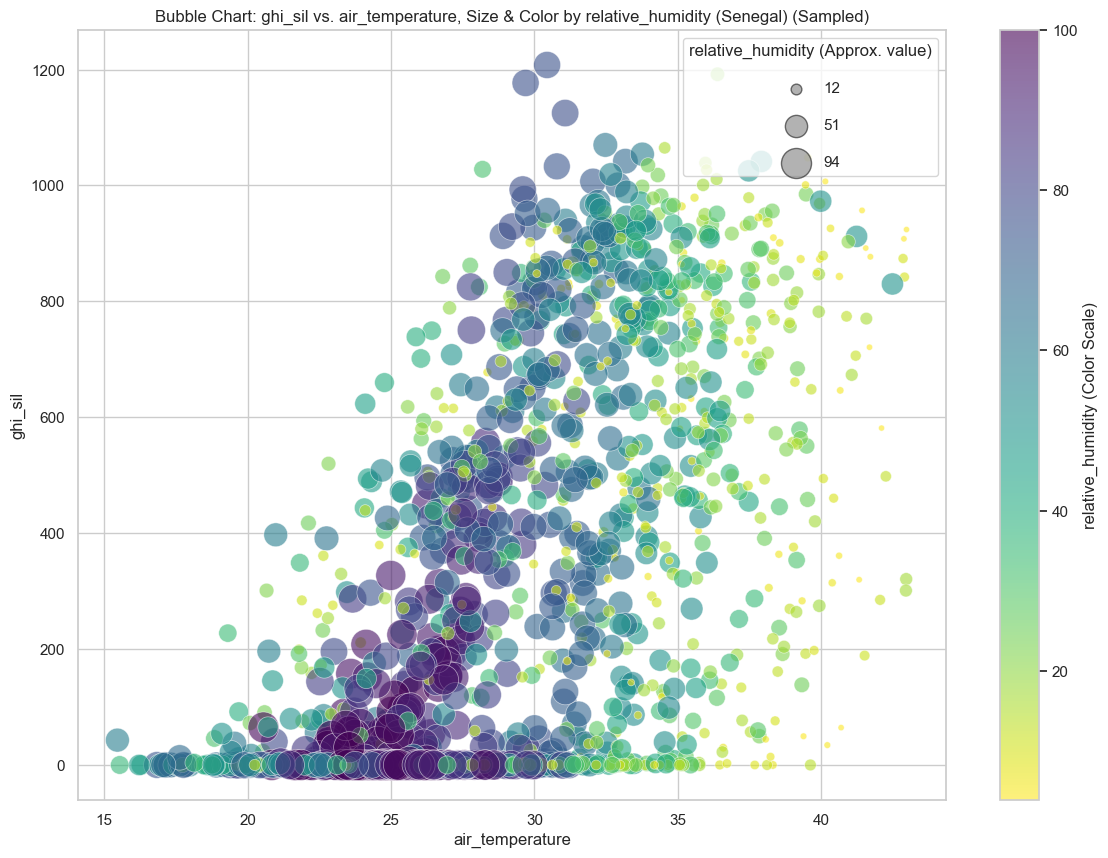

In [10]:

print(f"\n--- Bubble Chart ({COUNTRY_NAME}) ---")

bubble_x_col = 'air_temperature'
bubble_y_col = 'ghi_sil'     
bubble_size_col = 'relative_humidity'

if all(c in df_cleaned.columns for c in [bubble_x_col, bubble_y_col, bubble_size_col]):
 

    plt.figure(figsize=(14, 10))
 
    sizes = df_scatter_sample[bubble_size_col]
    
    if bubble_size_col == 'relative_humidity':
   
        scaled_sizes = sizes * 5
    elif bubble_size_col == 'barometric_pressure':
     
        min_bp = df_scatter_sample[bubble_size_col].min()
        scaled_sizes = (sizes - min_bp + 1) * 0.5 
    else:
        scaled_sizes = sizes

    scaled_sizes = np.maximum(scaled_sizes, 0.1)


    scatter = plt.scatter(
        data=df_scatter_sample,
        x=bubble_x_col,
        y=bubble_y_col,
        s=scaled_sizes, # Bubble area
        c=df_scatter_sample[bubble_size_col], 
        cmap='viridis_r', 
        alpha=0.6,
        edgecolors="w",
        linewidth=0.5
    )
    
    plt.title(f'Bubble Chart: {bubble_y_col} vs. {bubble_x_col}, Size & Color by {bubble_size_col} ({COUNTRY_NAME}) (Sampled)')
    plt.xlabel(bubble_x_col)
    plt.ylabel(bubble_y_col)
    
   
    percentiles_for_legend = np.percentile(sizes, [10, 50, 90])
    if bubble_size_col == 'relative_humidity':
        scaled_legend_sizes = percentiles_for_legend * 5
    elif bubble_size_col == 'barometric_pressure':
        min_bp = df_scatter_sample[bubble_size_col].min() # Recalculate if not in scope
        scaled_legend_sizes = (percentiles_for_legend - min_bp + 1) * 0.5
    else:
        scaled_legend_sizes = percentiles_for_legend
    
    legend_handles = [plt.scatter([], [], s=s_val, edgecolors="k", color="gray", alpha=0.6, label=f"{p_val:.0f}") 
                      for s_val, p_val in zip(scaled_legend_sizes, percentiles_for_legend)]

    plt.legend(handles=legend_handles, title=f"{bubble_size_col} (Approx. value)", loc="upper right", labelspacing=1.5)
    
    cbar = plt.colorbar(scatter, label=f'{bubble_size_col} (Color Scale)')
    
    plt.grid(True)
    plt.show()
else:
    print(f"Skipping Bubble Chart: One or more columns ({bubble_x_col}, {bubble_y_col}, {bubble_size_col}) missing.")